<a href="https://colab.research.google.com/github/zahira-07/Estadistica-/blob/main/Proyecto_U2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/zahira-07/Estadistica-/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv")
df.dropna(inplace = True)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Fuma,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


**Se determina que la variable "Weight-Peso" depende de NCP: Número de comidas principales al día.**
La relación entre el peso y el número de comidas al día es un factor importante en los niveles de obesidad. En general, se ha encontrado que las personas que comen más frecuentemente durante el día tienden a tener un peso más saludable y un menor riesgo de obesidad. Esto se debe a que comer con frecuencia puede ayudar a controlar el apetito y evitar la ingesta excesiva de calorías en una sola comida.

Por otro lado, las personas que comen menos frecuentemente durante el día pueden tener un mayor riesgo de obesidad, ya que pueden sentirse más hambrientos y comer en exceso en las comidas que sí realizan. Además, comer menos frecuentemente puede llevar a un metabolismo más lento, lo que puede dificultar la pérdida de peso.




**Gender_Genero**
La relación entre el género (hombre/mujer) y los niveles de obesidad es compleja y se ve influenciada por varios factores, incluyendo hábitos alimentarios y condición física. Los hombres tienden a consumir más calorías que las mujeres, especialmente en forma de grasas y carbohidratos, y prefieren alimentos más grasosos y procesados. Por otro lado, las mujeres tienden a preferir alimentos más saludables, como frutas y verduras, y comer más frecuentemente que los hombres.

En cuanto a la condición física, los hombres tienden a ser más activos físicamente que las mujeres, especialmente en actividades como el deporte y el ejercicio. Sin embargo, las mujeres tienden a tener un mayor porcentaje de grasa corporal que los hombres, especialmente en la zona abdominal. Esto puede aumentar el riesgo de enfermedades relacionadas con la obesidad.

In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Peso~ C(Genero)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Genero),1.0,3.782900e+04,37829.002949,56.59929,7.861876e-14
Residual,2109.0,1.409582e+06,668.365328,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
Female   Male    8.467   0.0 6.2599 10.6741   True
--------------------------------------------------


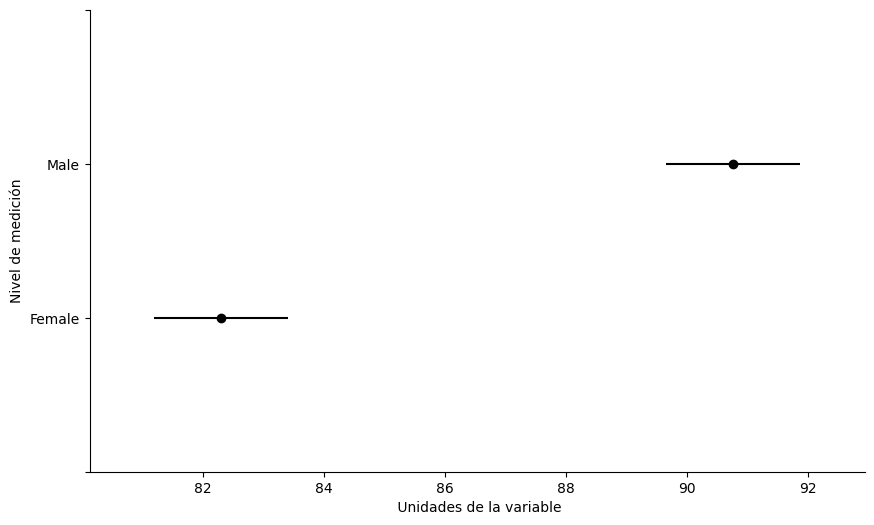

In [139]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Peso'], groups = df['Genero'],
alpha = nivel_significancia)
tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel=" Unidades de la variable" )
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

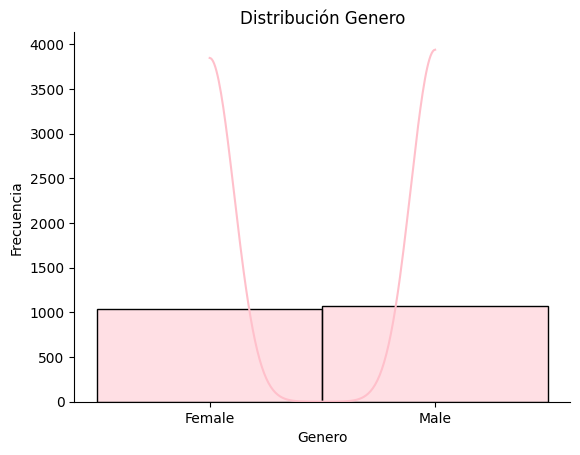

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Genero'], kde = True, color = 'pink')

plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.title('Distribución Genero')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [141]:
niveles = {'Female': 0, 'Male':10}
df['Genero'] = df['Genero'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Fuma,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,10,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


AGE: La edad se relaciona de manera significativa con los niveles de obesidad según los hábitos alimenticios. A medida que las personas envejecen, sus hábitos alimenticios pueden cambiar, lo que puede afectar su peso y su riesgo de obesidad.

En la infancia y la adolescencia, los hábitos alimenticios pueden ser influenciados por la familia y la cultura. Los niños y adolescentes que consumen alimentos procesados y ricos en grasas y azúcares tienen un mayor riesgo de desarrollar obesidad.

En la edad adulta, los hábitos alimenticios pueden ser influenciados por factores como el estrés, la falta de tiempo y la conveniencia. Los adultos que consumen alimentos procesados y ricos en grasas y azúcares, y que no realizan actividad física regular, tienen un mayor riesgo de desarrollar obesidad.

En la vejez, los hábitos alimenticios pueden ser influenciados por factores como la pérdida de dientes, la dificultad para cocinar y la falta de apetito. Los ancianos que consumen alimentos procesados y ricos en grasas y azúcares, y que no realizan actividad física regular, tienen un mayor riesgo de desarrollar obesidad.



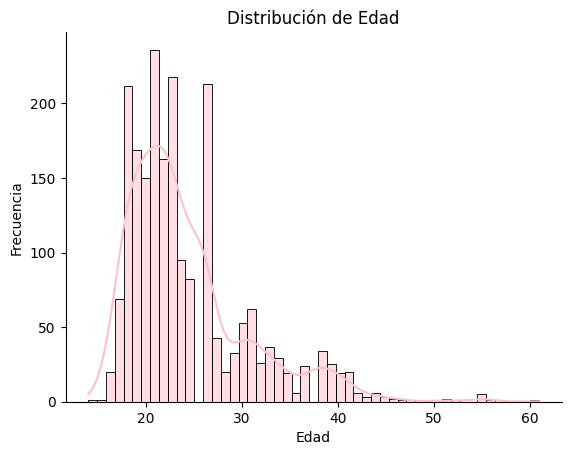

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Edad'], kde = True, color = 'pink')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

**Height:**

La altura se relaciona de manera indirecta con los niveles de obesidad según los hábitos alimentarios, los antecedentes y la condición física. Las personas más altas pueden requerir una mayor ingesta calórica para mantener su peso, lo que puede aumentar el riesgo de obesidad si no se controla adecuadamente. Sin embargo, la altura no parece influir directamente en la elección de alimentos o en la actividad física. La historia familiar de obesidad, la edad y el género pueden influir en la relación entre la altura y la obesidad. La actividad física regular y una composición corporal saludable son fundamentales para mantener un peso saludable, independientemente de la altura. En resumen, la altura es solo un factor entre muchos que pueden influir en los niveles de obesidad, y es importante considerar todos los factores para reducir el riesgo de obesidad.

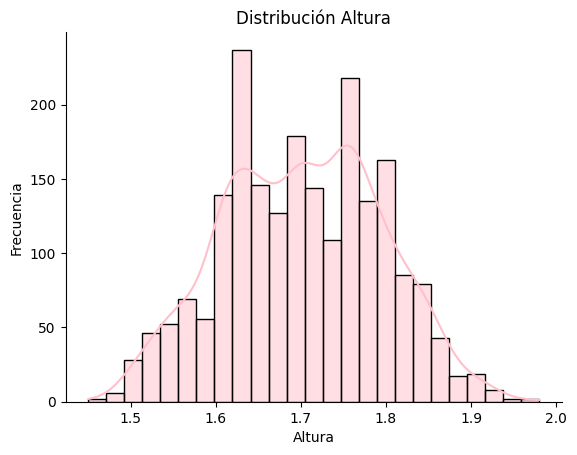

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Altura'], kde = True, color = 'pink')

plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.title('Distribución Altura')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

**Weight**

El peso se relaciona de manera directa con los niveles de obesidad según los hábitos alimenticios, los antecedentes y la condición física de una persona. Una ingesta calórica excesiva, la elección de alimentos procesados y ricos en grasas y azúcares, y la falta de actividad física pueden contribuir al aumento de peso y obesidad. La historia familiar de obesidad, la edad y el género también pueden influir en la relación entre el peso y la obesidad. Además, la composición corporal y el nivel de condición física pueden influir en la capacidad para realizar actividad física y mantener un peso saludable.

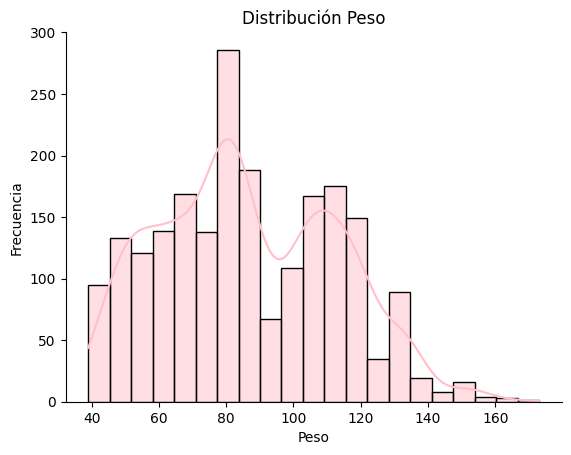

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Peso'], kde = True, color = 'pink')

plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución Peso')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

 **family_history_with_overweight**

El historial de la familia de su peso se relaciona de manera significativa con los niveles de obesidad según los hábitos alimentarios de una persona. Cuando una persona proviene de una familia con antecedentes de obesidad, es más probable que desarrolle hábitos alimentarios poco saludables y tenga un mayor riesgo de obesidad. Esto se debe a que los hábitos alimentarios y el estilo de vida se aprenden en la familia y pueden ser transmitidos de generación en generación.

In [145]:
df["Antecedentes Familiares"].unique()


array(['yes', 'no'], dtype=object)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no    yes   33.689   0.0 31.176 36.202   True
-------------------------------------------------


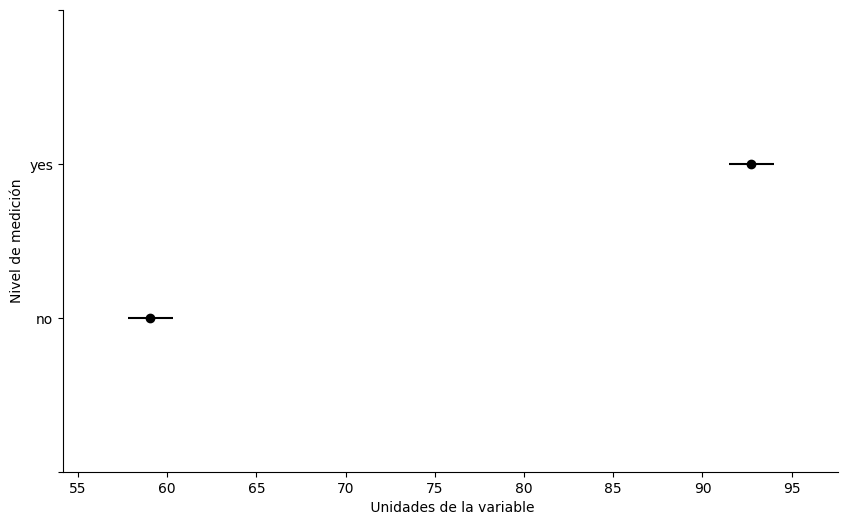

In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Peso'], groups = df['Antecedentes Familiares'],
alpha = nivel_significancia)
tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel=" Unidades de la variable" )
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

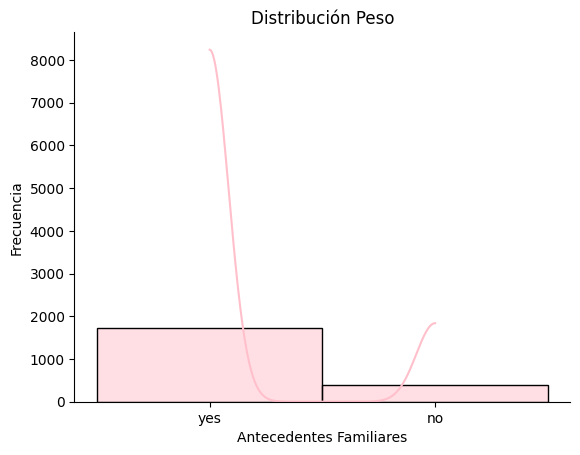

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Antecedentes Familiares'], kde = True, color = 'pink')

plt.xlabel('Antecedentes Familiares')
plt.ylabel('Frecuencia')
plt.title('Distribución Peso')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [148]:
niveles = {'no': 10, 'yes':20}
df['Antecedentes Familiares'] = df['Antecedentes Familiares'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Fuma,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,20,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,20,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,10,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,10,22,1.78,89.80,10,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,20,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,20,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,20,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III



**FAVC**

Una persona que consume altamente frecuente alimentos en calorías se relaciona de manera directa con los niveles de obesidad según los hábitos alimentarios, los antecedentes y la condición física. Consumir alimentos altos en calorías de manera frecuente puede llevar a una ingesta calórica excesiva, lo que puede contribuir al aumento de peso y la obesidad. La elección de alimentos procesados y ricos en grasas y azúcares también puede ser un factor de riesgo para la obesidad. Además, la historia familiar de obesidad, la edad y el género pueden influir en la relación entre la ingesta calórica y la obesidad.

In [149]:
unique_values = df['Alimentos con calorias'].unique()
print(unique_values)


['no' 'yes']


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no    yes  22.2614   0.0 18.9023 25.6206   True
---------------------------------------------------


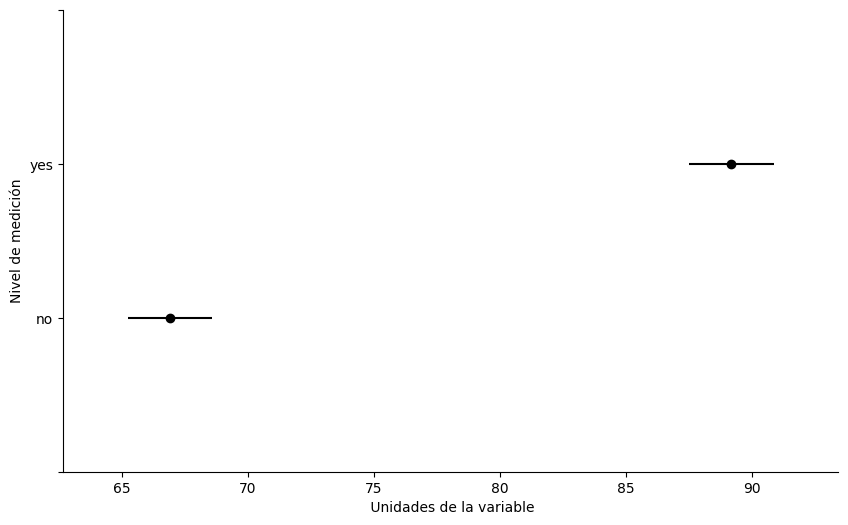

In [150]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Peso'], groups = df['Alimentos con calorias'],
alpha = nivel_significancia)
tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel=" Unidades de la variable" )
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

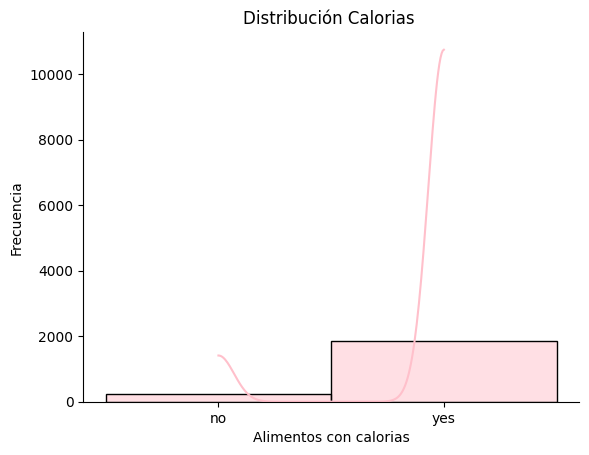

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Alimentos con calorias'], kde = True, color = 'pink')

plt.xlabel('Alimentos con calorias')
plt.ylabel('Frecuencia')
plt.title('Distribución Calorias ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [152]:
niveles = {'no': 15, 'yes':30}
df['Alimentos con calorias'] = df['Alimentos con calorias'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Fuma,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,15,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,20,15,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,20,15,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,10,15,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,10,22,1.78,89.80,10,15,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,20,30,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,20,30,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,20,30,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


**FCVC**

El consumo de verduras influye de manera positiva en los niveles de obesidad según los hábitos alimentarios. Las verduras son bajas en calorías y ricas en nutrientes, lo que las hace ideales para una dieta saludable. El alto contenido de fibra en las verduras puede ayudar a reducir el apetito y aumentar la sensación de saciedad, lo que puede contribuir a una reducción del peso y la circunferencia de la cintura. Además, las verduras pueden ayudar a mejorar la composición corporal, reduciendo la grasa corporal y aumentando la masa muscular. En general, el consumo regular de verduras puede ser una herramienta efectiva para reducir el riesgo de obesidad y mantener un peso saludable.

In [153]:
unique_values = df['Frecuencia de consumo de verduras'].unique()
print(unique_values)

[2.   3.   1.   2.45 2.88 2.01 2.6  2.59 2.39 1.12 2.03 2.66 2.89 2.71
 2.75 1.49 2.21 2.06 2.31 2.82 2.05 2.77 2.74 2.57 2.52 2.97 1.08 1.27
 1.34 2.96 2.73 2.84 2.44 2.43 2.93 2.02 1.03 1.59 1.21 1.52 2.7  2.36
 2.14 2.56 2.34 1.81 2.72 1.13 1.76 2.98 2.2  2.53 2.24 2.65 2.9  2.48
 2.95 2.78 1.01 2.94 1.89 1.95 2.28 2.37 2.32 2.62 1.05 2.76 2.07 2.69
 2.79 2.67 1.14 2.19 2.92 2.85 2.58 2.51 2.91 2.61 2.63 2.49 1.69 1.6
 1.2  2.87 1.64 1.57 1.04 1.65 2.12 2.86 2.42 1.79 1.3  1.87 1.45 2.11
 1.94 1.75 2.54 2.4  1.62 1.28 1.73 2.3  2.29 1.91 1.83 2.22 2.8  2.09
 1.9  1.98 1.06 1.99 2.25 1.31 1.32 2.81 2.46 2.64 2.1  1.97 2.18 2.15
 1.77 1.19 2.99 2.27 2.16 1.84 1.88 2.55 1.93 1.96 2.13 2.68 2.26 2.35
 1.72 1.1  2.41 1.78 2.33 2.04 2.5  2.08 1.36 1.71 1.85 2.47 1.56 1.16
 1.92 1.22 1.37 1.33 1.26 1.39 1.11 1.63 1.43 2.23 1.46 2.38 1.48 2.83
 1.17 1.44 1.8  1.74 1.66 1.54 1.4  1.07 1.41 1.29 1.53 1.47]


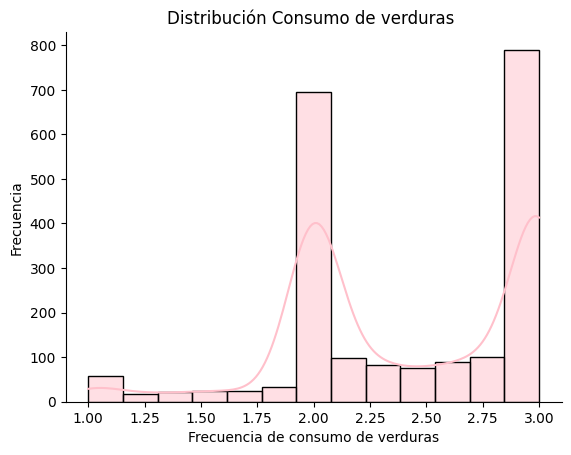

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Frecuencia de consumo de verduras'], kde = True, color = 'pink')

plt.xlabel('Frecuencia de consumo de verduras')
plt.ylabel('Frecuencia')
plt.title('Distribución Consumo de verduras ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


**NCP – Número de comidas principales al día.**
El número de comidas al día puede influir en los niveles de obesidad según los hábitos alimenticios. Comer con frecuencia puede aumentar el apetito y llevar a consumir más calorías, especialmente si se eligen alimentos procesados y ricos en grasas y azúcares. Por otro lado, comer pocas veces al día puede reducir el metabolismo y aumentar el hambre, lo que puede llevar a consumir más calorías en las comidas. Es importante encontrar un equilibrio saludable, comiendo 3-5 veces al día, incluyendo desayuno, almuerzo, cena y posiblemente un par de meriendas saludables, y eligiendo alimentos saludables y equilibrados en cada comida. Controlar las porciones también es fundamental para evitar consumir demasiadas calorías y mantener un peso saludable.



In [155]:
unique_values = df['No.Comidas'].unique()
print(unique_values)

[3.   1.   4.   3.29 1.73 2.58 1.6  1.74 1.11 2.08 1.89 2.86 3.77 3.69
 3.16 1.08 3.56 3.89 3.24 3.9  3.11 3.59 2.06 2.   3.82 3.09 3.75 3.57
 3.73 3.52 1.26 1.27 3.3  3.65 3.54 1.72 2.88 3.63 1.47 3.17 3.49 2.99
 2.13 3.91 3.7  3.18 3.8  1.63 3.76 3.37 2.71 3.34 2.22 2.89 3.5  3.19
 1.7  2.81 1.61 1.88 2.33 1.99 2.97 3.72 3.38 3.26 3.99 3.25 1.16 3.41
 3.28 3.21 3.47 3.44 3.04 3.64 2.65 3.42 2.64 2.63 3.1  3.13 3.97 3.71
 3.83 3.58 3.27 3.43 3.53 1.23 1.06 3.6  3.74 3.45 1.51 2.78 3.94 3.05
 2.98 1.39 1.58 3.62 3.36 1.15 3.98 1.92 2.11 1.1  1.3  2.66 2.45 2.79
 1.13 2.49 3.61 3.95 2.95 2.8  2.23 1.2  1.56 1.05 1.19 3.39 3.55 2.37
 1.21 1.59 2.73 1.07 1.41 2.75 2.74 2.61 3.31 2.34 1.71 3.06 3.2  1.14
 3.32 2.94 2.85 3.48 2.39 2.76 3.12 1.87 2.12 2.96 2.4  2.87 1.03 2.7
 2.3  2.56 3.79 1.01 2.67 1.32 2.04 2.47 3.07 2.28 1.12 2.26 2.55 1.24
 1.66 2.6  2.72 1.98 2.68 1.62 2.59 1.55 3.88 2.36 1.8  3.01 2.27 2.9
 2.69 1.18 1.84 1.81 1.95 1.53 1.35 2.44 2.84 2.16 1.17 1.67 2.52 1.34
 2.91 1.

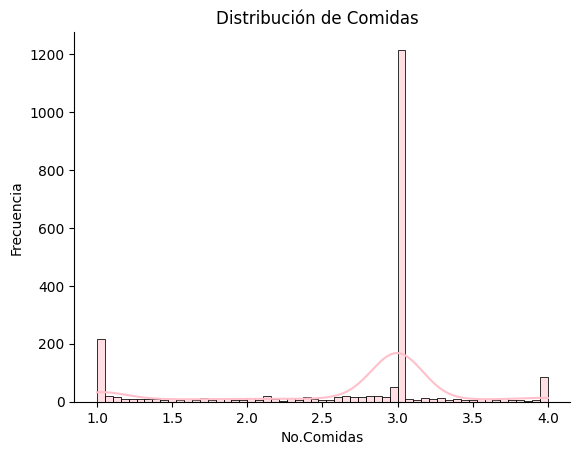

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['No.Comidas'], kde = True, color = 'pink')

plt.xlabel('No.Comidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Comidas  ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

CAEC – Frecuencia de consumo de alimentos entre comidas (Nunca, A veces, Frecuentemente, Siempre).

La frecuencia de consumos de alimentos entre comidas puede tener una relación significativa con los niveles de obesidad en ciertas personas.

In [157]:
df["Consumo entre comidas"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
    Always Frequently -12.2047 0.0041 -21.4823  -2.9271   True
    Always  Sometimes  20.2697    0.0  11.7415  28.7979   True
    Always         no   -2.188 0.9659 -14.1876   9.8115  False
Frequently  Sometimes  32.4744    0.0   28.281  36.6678   True
Frequently         no  10.0167 0.0322    0.591  19.4424   True
 Sometimes         no -22.4577    0.0 -31.1468 -13.7687   True
--------------------------------------------------------------


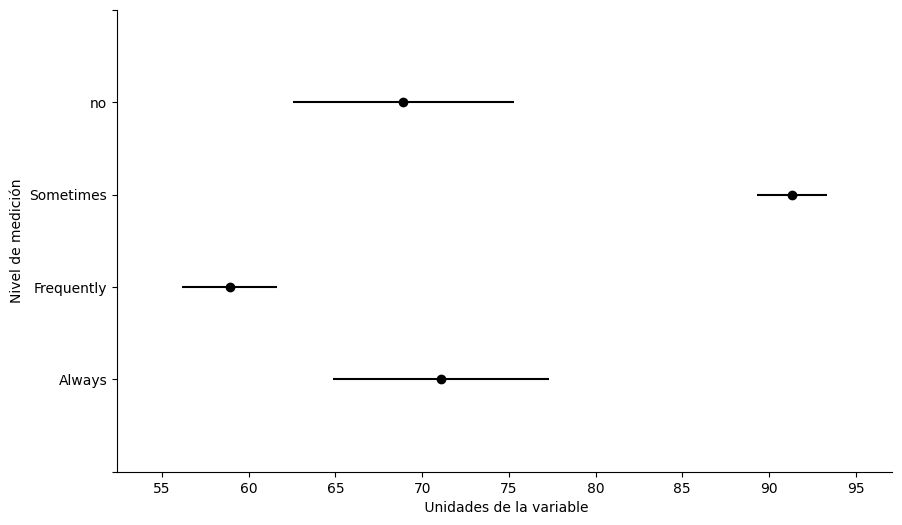

In [158]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Peso'], groups = df['Consumo entre comidas'],
alpha = nivel_significancia)
tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel=" Unidades de la variable" )
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [159]:
niveles = {'no': 0, 'Sometimes':1,"Frequently":2,"Always":0}
df['Consumo entre comidas'] = df['Consumo entre comidas'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Fuma,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,15,2.0,3.0,1,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,20,15,3.0,3.0,1,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,20,15,2.0,3.0,1,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,10,15,3.0,3.0,1,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,10,22,1.78,89.80,10,15,2.0,1.0,1,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,1,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,20,30,3.0,3.0,1,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,20,30,3.0,3.0,1,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,20,30,3.0,3.0,1,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


SMOKE – Whether the person smokes (yes/no).
FUMAR – Si la persona fuma (sí/no).


Una persona que fuma puede tener una relación compleja con la obesidad y los hábitos alimenticios. El tabaquismo puede estar asociado con una pérdida de peso inicial, ya que la nicotina puede suprimir el apetito y aumentar el metabolismo. Sin embargo, después de dejar de fumar, muchas personas experimentan un aumento de peso, ya que la nicotina ya no suprime el apetito y el metabolismo disminuye. Además, los fumadores suelen tener una dieta menos saludable que los no fumadores, con un mayor consumo de grasas y azúcares.

In [160]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Peso~ C(Fuma)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
#H0 no rechaza
#eliminar Smoke

,df,sum_sq,mean_sq,F,PR(>F)
C(Fuma),1.0,9.594705e+02,959.470452,1.398956,0.237032
Residual,2109.0,1.446452e+06,685.847325,NaN,NaN


In [161]:
df.drop(columns = ['Fuma'], inplace = True)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,15,2.0,3.0,1,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,20,15,3.0,3.0,1,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,20,15,2.0,3.0,1,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,10,15,3.0,3.0,1,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,10,22,1.78,89.80,10,15,2.0,1.0,1,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,1,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,20,30,3.0,3.0,1,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,20,30,3.0,3.0,1,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,20,30,3.0,3.0,1,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


CH2O – Daily water intake (scale from 1 to 3).
CH2O – Ingesta diaria de agua (escala del 1 al 3).
La ingesta diaria de agua en el cuerpo humano tiene un impacto significativo en la obesidad y los hábitos alimenticios. Beber suficiente agua puede ayudar a controlar el apetito y reducir la ingesta calórica, aumentar el metabolismo y mejorar la quema de grasas, y reducir la retención de líquidos y mejorar la apariencia física.

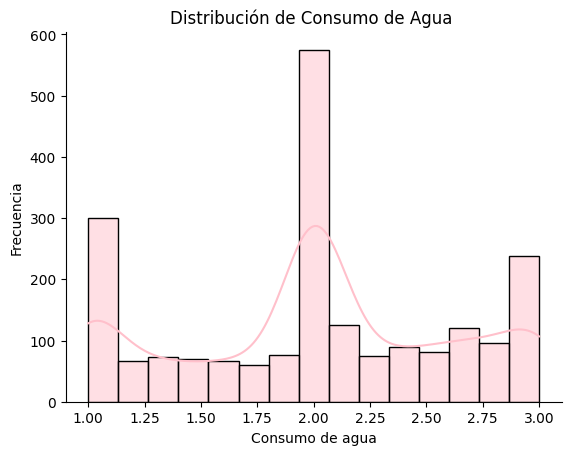

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Consumo de agua'], kde = True, color = 'pink')

plt.xlabel('Consumo de agua')
plt.ylabel('Frecuencia')
plt.title('Distribución de Consumo de Agua ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

SCC – If the person monitors their calorie intake (yes/no).
SCC – Si la persona monitorea su ingesta calórica (sí/no).

Una persona que monitorea su ingesta calórica puede tener una relación positiva con la reducción de la obesidad y la mejora de los hábitos alimenticios. Al llevar un registro de la ingesta calórica diaria, una persona puede conocer su consumo calórico, establecer metas realistas, mejorar la toma de decisiones y aumentar la conciencia sobre los hábitos alimenticios. Esto puede ayudar a reducir el peso, mejorar la composición corporal y aumentar la motivación para mantener un estilo de vida saludable. Además, monitorear la ingesta calórica puede ayudar a identificar patrones poco saludables y reemplazarlos con hábitos más saludables, lo que puede tener un impacto positivo en la salud y el bienestar en general

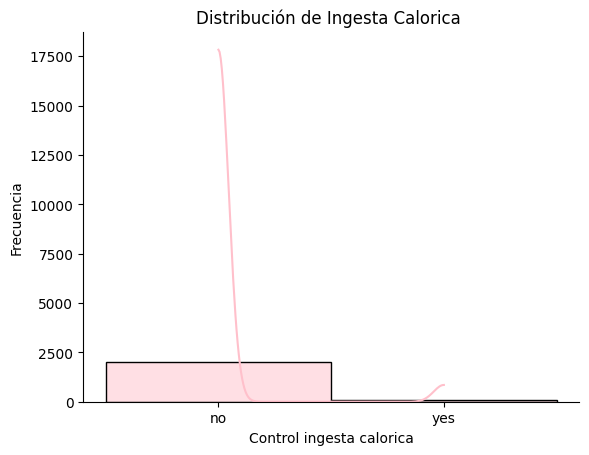

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Control ingesta calorica'], kde = True, color = 'pink')

plt.xlabel('Control ingesta calorica')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingesta Calorica ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [164]:
niveles = {'no': 0, 'yes':1,}
df['Control ingesta calorica'] = df['Control ingesta calorica'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,15,2.0,3.0,1,2.00,0,0.00,1.000,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,20,15,3.0,3.0,1,3.00,1,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,20,15,2.0,3.0,1,2.00,0,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,10,15,3.0,3.0,1,2.00,0,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,10,22,1.78,89.80,10,15,2.0,1.0,1,2.00,0,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,1,1.73,0,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,20,30,3.0,3.0,1,2.01,0,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,20,30,3.0,3.0,1,2.05,0,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,20,30,3.0,3.0,1,2.85,0,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


FAF – Physical activity frequency (scale from 0 to 3).
FAF – Frecuencia de actividad física (escala de 0 a 3).


La frecuencia de actividad física se relaciona de manera significativa con los datos de obesidad y hábitos alimenticios. La actividad física regular puede ayudar a quemar calorías y reducir el riesgo de obesidad, mejorar la composición corporal y aumentar la masa muscular, y mejorar los hábitos alimenticios. Por otro lado, la falta de actividad física puede aumentar el riesgo de obesidad y enfermedades relacionadas, deteriorar la composición corporal y empeorar los hábitos alimenticios. Se recomienda realizar al menos 150 minutos de actividad física moderada a la semana y buscar actividades físicas que sean placenteras para mantener un estilo de vida activo.

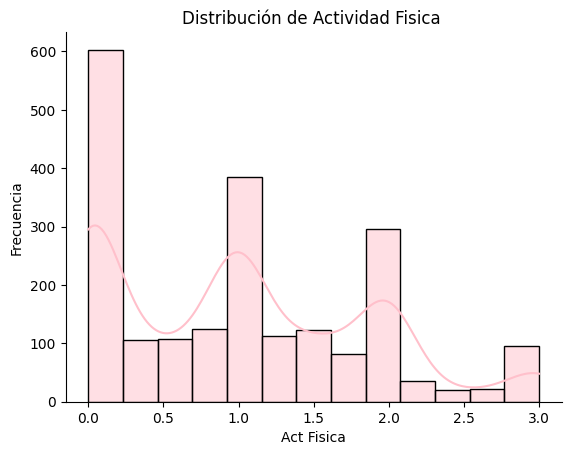

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Act Fisica'], kde = True, color = 'pink')

plt.xlabel('Act Fisica')
plt.ylabel('Frecuencia')
plt.title('Distribución de Actividad Fisica ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

TUE – Time spent using technology (scale from 0 to 3).

MAR – Tiempo dedicado al uso de tecnología (escala de 0 a 3).

La frecuencia de actividad física se relaciona de manera significativa con los datos de obesidad y hábitos alimenticios. La actividad física regular puede ayudar a quemar calorías y reducir el riesgo de obesidad, mejorar la composición corporal y aumentar la masa muscular, y mejorar los hábitos alimenticios. Por otro lado, la falta de actividad física puede aumentar el riesgo de obesidad y enfermedades relacionadas, deteriorar la composición corporal y empeorar los hábitos alimenticios. Se recomienda realizar al menos 150 minutos de actividad física moderada a la semana y buscar actividades físicas que sean placenteras para mantener un estilo de vida activo.

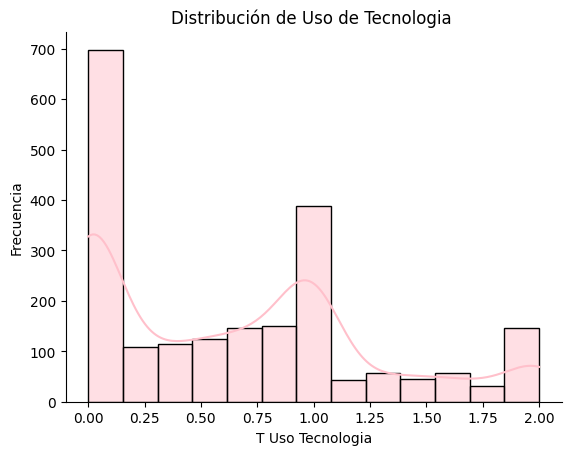

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['T Uso Tecnologia'], kde = True, color = 'pink')

plt.xlabel('T Uso Tecnologia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Uso de Tecnologia ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).

CALC – Frecuencia de consumo de alcohol (Nunca, A veces, Frecuentemente, Siempre).

El tiempo dedicado al uso de la tecnología puede tener una relación significativa con la obesidad y los hábitos alimenticios. El uso excesivo de la tecnología puede llevar a un estilo de vida sedentario, falta de actividad física y cambios en los hábitos alimenticios, lo que puede aumentar el riesgo de obesidad y enfermedades relacionadas. Se recomienda limitar el tiempo de uso de la tecnología, fomentar la actividad física y promover hábitos alimenticios saludables.

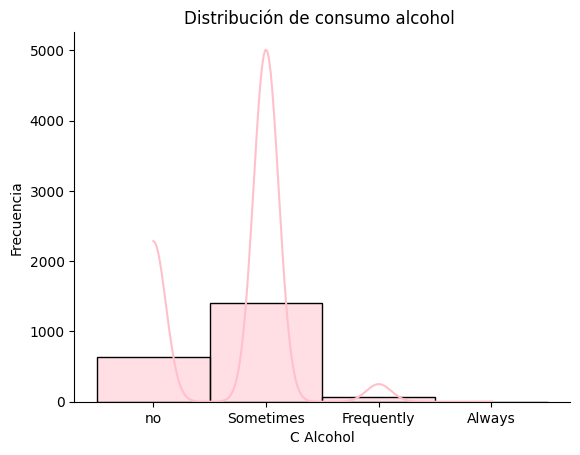

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['C Alcohol'], kde = True, color = 'pink')

plt.xlabel('C Alcohol')
plt.ylabel('Frecuencia')
plt.title('Distribución de consumo alcohol ')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [168]:
niveles = {'no': 0, 'Sometimes':1,"Frequently":2, "Always":3}
df['C Alcohol'] = df['C Alcohol'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,15,2.0,3.0,1,2.00,0,0.00,1.000,0,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,20,15,3.0,3.0,1,3.00,1,3.00,0.000,1,Public_Transportation,Normal_Weight
2,10,23,1.80,77.00,20,15,2.0,3.0,1,2.00,0,2.00,1.000,2,Public_Transportation,Normal_Weight
3,10,27,1.80,87.00,10,15,3.0,3.0,1,2.00,0,2.00,0.000,2,Walking,Overweight_Level_I
4,10,22,1.78,89.80,10,15,2.0,1.0,1,2.00,0,0.00,0.000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,1,1.73,0,1.68,0.906,1,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,20,30,3.0,3.0,1,2.01,0,1.34,0.599,1,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,20,30,3.0,3.0,1,2.05,0,1.41,0.646,1,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,20,30,3.0,3.0,1,2.85,0,1.14,0.586,1,Public_Transportation,Obesity_Type_III


MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).

MTRANS – Modo principal de transporte (Automóvil, Bicicleta, Motocicleta, Transporte Público, Caminar).

El modo principal de transporte de una persona puede tener un impacto significativo en sus niveles de obesidad y hábitos alimenticios. Los modos de transporte activos, como caminar y bicicletar, pueden ayudar a quemar calorías y mejorar la salud cardiovascular, reduciendo el riesgo de obesidad y mejorando los hábitos alimenticios. Por otro lado, los modos de transporte sedentarios, como el automóvil y la motocicleta, pueden contribuir a un estilo de vida sedentario, aumentando el riesgo de obesidad y enfermedades relacionadas. Se recomienda incorporar actividad física en el transporte, elegir modos de transporte activos y combinar el transporte público con actividad física para mejorar la salud y reducir el riesgo de obesidad.

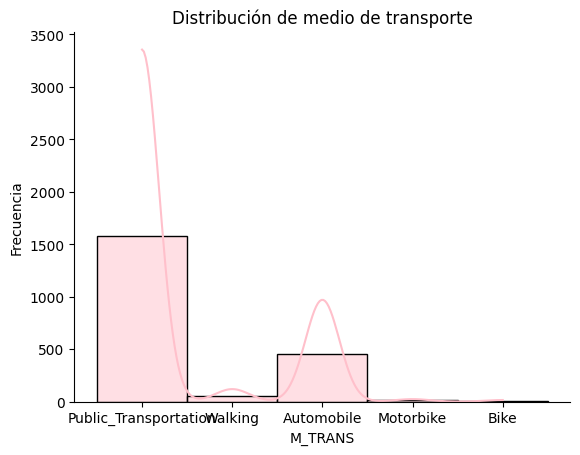

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['M_TRANS'], kde = True, color = 'pink')

plt.xlabel('M_TRANS')
plt.ylabel('Frecuencia')
plt.title('Distribución de medio de transporte')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [170]:
niveles = {'Public_Transportation': 0, 'Walking':1,"Automobile":2, "Bike":3}
df['M_TRANS'] = df['M_TRANS'].map(niveles)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS,Niv_Obesidad
0,0,21,1.62,64.00,20,15,2.0,3.0,1,2.00,0,0.00,1.000,0,0.0,Normal_Weight
1,0,21,1.52,56.00,20,15,3.0,3.0,1,3.00,1,3.00,0.000,1,0.0,Normal_Weight
2,10,23,1.80,77.00,20,15,2.0,3.0,1,2.00,0,2.00,1.000,2,0.0,Normal_Weight
3,10,27,1.80,87.00,10,15,3.0,3.0,1,2.00,0,2.00,0.000,2,1.0,Overweight_Level_I
4,10,22,1.78,89.80,10,15,2.0,1.0,1,2.00,0,0.00,0.000,1,0.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,1,1.73,0,1.68,0.906,1,0.0,Obesity_Type_III
2107,0,22,1.75,133.74,20,30,3.0,3.0,1,2.01,0,1.34,0.599,1,0.0,Obesity_Type_III
2108,0,23,1.75,133.69,20,30,3.0,3.0,1,2.05,0,1.41,0.646,1,0.0,Obesity_Type_III
2109,0,24,1.74,133.35,20,30,3.0,3.0,1,2.85,0,1.14,0.586,1,0.0,Obesity_Type_III


NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

NObeyesdad – Nivel de obesidad (Peso insuficiente, Peso normal, Sobrepeso nivel I, Sobrepeso nivel II, Obesidad tipo I, Obesidad tipo II, Obesidad tipo III).

Los niveles de obesidad y obesidad en personas están estrechamente relacionados con sus hábitos alimenticios. Una dieta rica en calorías, grasas saturadas y azúcares refinados puede contribuir al aumento de peso y la obesidad. Por otro lado, una dieta equilibrada y saludable, rica en frutas, verduras, granos integrales y proteínas magras, puede ayudar a mantener un peso saludable y reducir el riesgo de obesidad.

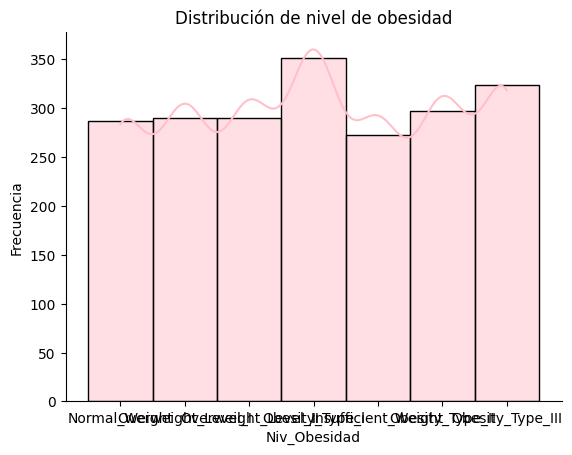

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Niv_Obesidad'], kde = True, color = 'pink')

plt.xlabel('Niv_Obesidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de nivel de obesidad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [172]:
df.drop(columns = ['Niv_Obesidad'], inplace = True)
df

,Genero,Edad,Altura,Peso,Antecedentes Familiares,Alimentos con calorias,Frecuencia de consumo de verduras,No.Comidas,Consumo entre comidas,Consumo de agua,Control ingesta calorica,Act Fisica,T Uso Tecnologia,C Alcohol,M_TRANS
0,0,21,1.62,64.00,20,15,2.0,3.0,1,2.00,0,0.00,1.000,0,0.0
1,0,21,1.52,56.00,20,15,3.0,3.0,1,3.00,1,3.00,0.000,1,0.0
2,10,23,1.80,77.00,20,15,2.0,3.0,1,2.00,0,2.00,1.000,2,0.0
3,10,27,1.80,87.00,10,15,3.0,3.0,1,2.00,0,2.00,0.000,2,1.0
4,10,22,1.78,89.80,10,15,2.0,1.0,1,2.00,0,0.00,0.000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,20,30,3.0,3.0,1,1.73,0,1.68,0.906,1,0.0
2107,0,22,1.75,133.74,20,30,3.0,3.0,1,2.01,0,1.34,0.599,1,0.0
2108,0,23,1.75,133.69,20,30,3.0,3.0,1,2.05,0,1.41,0.646,1,0.0
2109,0,24,1.74,133.35,20,30,3.0,3.0,1,2.85,0,1.14,0.586,1,0.0


In [173]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X=df[["Genero","Edad","Altura","Antecedentes Familiares","Alimentos con calorias","Frecuencia de consumo de verduras","No.Comidas",	"Consumo entre comidas","Consumo de agua","Control ingesta calorica",	"Act Fisica",	"T Uso Tecnologia","C Alcohol",	"M_TRANS"]]
Y=df['Peso']

Matriz de Correlacion y Mapa de calor

Text(0.5, 1.0, 'Matriz de Correlación')

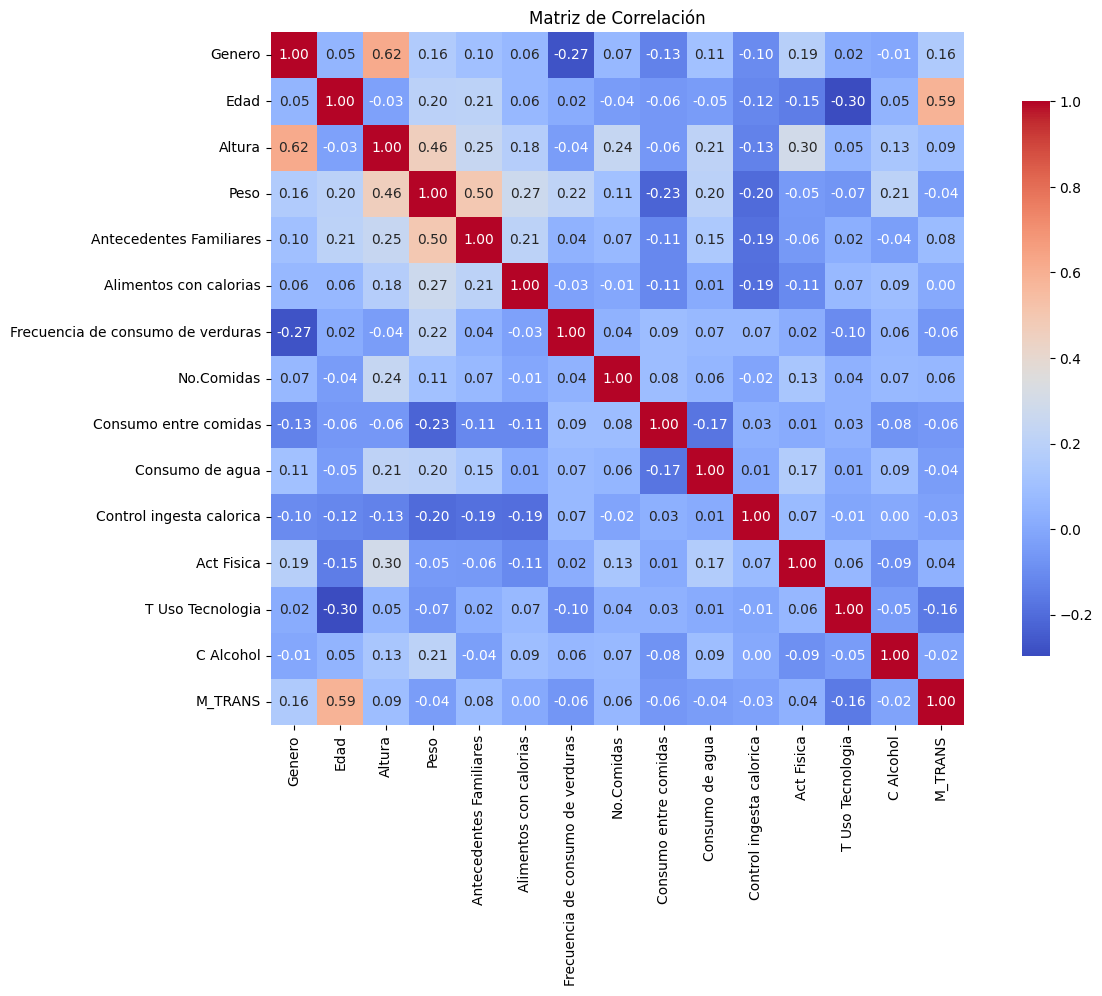

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize=(15, 9))

sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f",
square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')



Coeficiente de determinacion:  0.5700


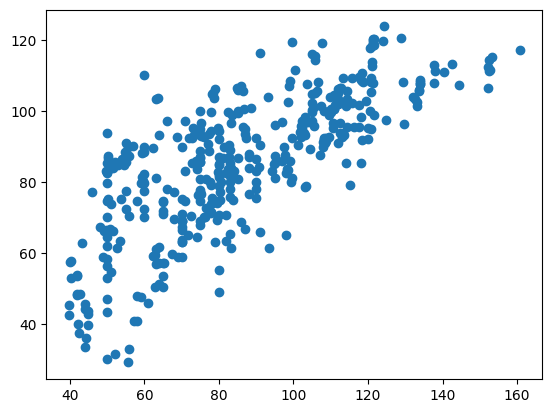

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['Genero',	'Edad',	'Altura',	'Antecedentes Familiares',	'Alimentos con calorias',	'Frecuencia de consumo de verduras',	'No.Comidas',	'Consumo entre comidas',	'Consumo de agua',	'Control ingesta calorica',	'Act Fisica',	'T Uso Tecnologia',	'C Alcohol',	'M_TRANS']]
Y = df['Peso']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

# Fit the model using the training data
modelo = smf.ols('Peso ~ Genero + Edad + Altura + Q("Antecedentes Familiares") + Q("Alimentos con calorias") + Q("Frecuencia de consumo de verduras") + Q("No.Comidas") + Q("Consumo entre comidas") + Q("Consumo de agua") + Q("Control ingesta calorica") + Q("Act Fisica") + Q("T Uso Tecnologia") + Q("C Alcohol") + Q("M_TRANS")', data=df).fit() # or your desired model

Yc = modelo.predict(X_test_constante)

# Check and handle NaN values in Yc
Yc = Yc.fillna(Yc.mean())  # Replace NaNs with the mean or another strategy

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

In [176]:
# Instead of unpacking into individual variables, unpack into a list
params = modelo.params
b0 = params['Intercept']  # Access the intercept using its name
b1 = params['Genero']
b2 = params['Edad']
b3 = params['Altura']
b4 = params['Q("Antecedentes Familiares")']
b5 = params['Q("Alimentos con calorias")']
b6 = params['Q("Frecuencia de consumo de verduras")']
b7 = params['Q("No.Comidas")']
b8 = params['Q("Consumo entre comidas")']
# ... (access other parameters similarly)

# You can also use list slicing if you want to work with specific parameter values:
# b0, b1, b2, b3, b4, b5, b6, b7, b8 = params[0:9]

Fun = lambda X1, X2, X3, X4, X5, X6, X7, X8: b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7 + b8 * X8

Fun(15, 50, 50 ,50, 70, 2, 0,2)

np.float64(6264.735887230352)

In [177]:
from statsmodels.formula.api import ols

# Replace with actual column names from your DataFrame
moedo_2 = ols(formula = 'Peso ~ Genero + Edad + Altura + Q("Antecedentes Familiares") + Q("Alimentos con calorias") + Q("Frecuencia de consumo de verduras") + Q("No.Comidas") + Q("Consumo entre comidas") + Q("Consumo de agua") + Q("Control ingesta calorica") + Q("Act Fisica") + Q("T Uso Tecnologia") + Q("C Alcohol") + Q("M_TRANS")', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
Genero,6067.360522,1.0,19.515565,1.048948e-05
Edad,43292.690608,1.0,139.250223,3.716089e-31
Altura,133197.033792,1.0,428.426056,1.037928e-86
"Q(""Antecedentes Familiares"")",108067.065806,1.0,347.595930,7.140200e-72
"Q(""Alimentos con calorias"")",8156.458995,1.0,26.235115,3.300823e-07
"Q(""Frecuencia de consumo de verduras"")",44952.707751,1.0,144.589641,2.999144e-32
"Q(""No.Comidas"")",275.580167,1.0,0.886399,3.465641e-01
"Q(""Consumo entre comidas"")",36909.751468,1.0,118.719605,6.319145e-27
"Q(""Consumo de agua"")",1368.591713,1.0,4.402053,3.601577e-02
"Q(""Control ingesta calorica"")",4287.710528,1.0,13.791350,2.096402e-04
